In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib
from matplotlib.lines import Line2D

folder = '../../AfterFailure'

In [ ]:
csvs = []

count_nan = 0
for i, file in enumerate(os.listdir(folder + '/csvs')):
    df = pd.read_csv(folder + '/csvs' + '/' + file)
    if (df.batch_size == 64).any():
        df.rename(columns={'Unnamed: 0' : 'epoch'}, inplace=True)
        count_nan += df.shape[0] * df.shape[1] - np.sum(df.count())
        df['list_index'] = len(csvs)
        filename = file.split("_")
        # print(filename[0][-2:].isdigit())
        if filename[0][-2:].isdigit(): df['exp'] = filename[0][-2:]
        else: df['exp'] = filename[0][-1]
        csvs.append(df)

print(f"Total number of Nans: {count_nan}")

In [32]:
nan_index = []
for i, df in enumerate(csvs):
    nan_index.append(list(df[(df['val_acc'].isnull()) | (df['train_acc'].isnull()) |(df['train_updates'].isnull()) | (df['val_updates'].isnull())].index))

print(nan_index)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [33]:
# weird_acc = []
# for i, df in enumerate(csvs):
#     weird_acc.append(list(df[(df['val_acc']>1) | (df['val_acc']<0.1) | (df['train_acc']>1) | (df['train_acc']<0.1)].index))
# # for df in csvs:
# #     df.drop(df[(df['val_acc']>1) | (df['val_acc']<0)].index, inplace = True)
#
# see = [csvs[i].iloc[l[0]] for i, l in enumerate(weird_acc) if l]
#
# early_stopped_dfs = []
# for i in range(len(csvs)):
#     n = nan_index[i]
#     v = weird_acc[i]
#     if n and v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(min(v), min(n))]])
#     elif n:
#         early_stopped_dfs.append(csvs[i].iloc[[min(n)]])
#     elif v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(v)]])
#

In [34]:
# early_stopped = pd.concat(early_stopped_dfs)
# early_stopped.drop(columns=['val_acc', 'train_acc', 'val_updates', 'train_updates', 'early_stopping'], inplace=True)
# print("Networks that stopped early")
# early_stopped
# csvs[0].columns
# csvs[2]
# for df in csvs:
#     print(len(df))

In [35]:
# manual_early_stopping = {4: 36,5: 28, 12: 12, 14:27, 32:18, 35:23, 41:35, 46: 12,53:12}
#
# for key, val in manual_early_stopping.items():
#     csvs[key].drop(labels = range(val, 40), inplace=True)

In [36]:
big_df = pd.concat(csvs)
big_df.describe()

,epoch,batch_size,cost_per_sample,hidden_units,learning_rate,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,test_acc,test_updates,entropy_loss,budget_loss,list_index,test_time,surprisal_loss
count,2101.000000,2101.0,2101.00000,2101.0,2.101000e+03,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,1054.000000,1.054000e+03
mean,48.739648,64.0,0.00001,32.0,2.500000e-04,0.050167,3.959543,0.809732,223.955802,0.829085,233.070035,0.805617,218.913620,0.372768,0.002331,10.204664,257.939968,3.312266e-03
std,30.019538,0.0,0.00000,0.0,1.084460e-19,0.050012,2.999965,0.071767,66.576730,0.083832,113.698448,0.071476,66.000123,0.102305,0.001137,6.291036,43.172426,2.060061e-02
min,0.000000,64.0,0.00001,32.0,2.500000e-04,0.000000,0.000000,0.487480,7.765224,0.486245,7.737981,0.489450,7.761285,0.241019,0.000077,0.000000,175.047673,9.910789e-08
25%,23.000000,64.0,0.00001,32.0,2.500000e-04,0.000000,1.000000,0.809195,192.764816,0.824987,194.124863,0.804955,188.335602,0.307906,0.001941,5.000000,204.365071,6.453326e-05
50%,47.000000,64.0,0.00001,32.0,2.500000e-04,0.100000,4.000000,0.835036,236.608871,0.854901,232.721359,0.831197,231.297546,0.340152,0.002327,10.000000,279.320619,1.363723e-04
75%,71.000000,64.0,0.00001,32.0,2.500000e-04,0.100000,7.000000,0.846154,260.352966,0.872796,260.279572,0.841814,253.928818,0.394616,0.002603,16.000000,290.445589,3.355999e-04
max,124.000000,64.0,0.00001,32.0,2.500000e-04,0.100000,9.000000,0.858373,1125.970215,0.906851,1717.352417,0.854567,1135.327759,0.699235,0.017174,21.000000,312.481397,2.285060e-01


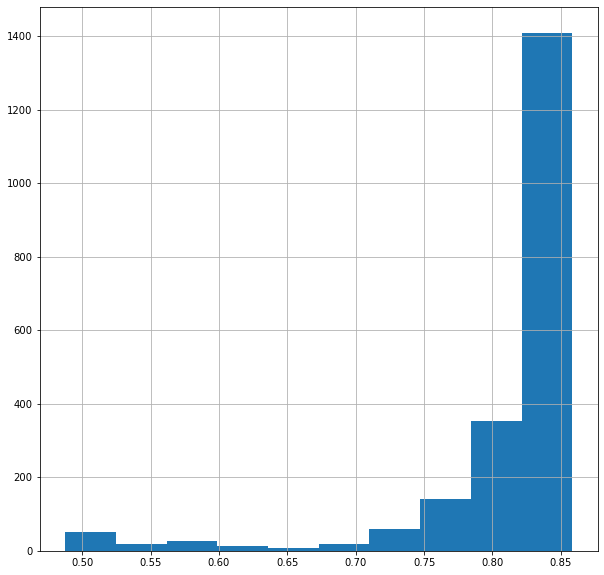

In [37]:
big_df['val_acc'].hist(figsize=(10, 10))

In [38]:
best_rows = []
best_accs = []
for df in csvs:
    best_accs.append(df.loc[:, 'val_acc'].max())
    best_rows.append(df.loc[df.loc[:, 'val_acc'].argmax()].to_dict())

In [39]:
best_df = pd.DataFrame(best_rows)
best_df = best_df.drop(columns= ["learning_rate", "hidden_units", "batch_size", "early_stopping"])

original = best_df[best_df['surprisal_cost'] == 0]
surprisal = best_df[best_df['surprisal_cost'] != 0]

In [40]:
print("No surprisal")
original

No surprisal


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,test_acc,test_updates,entropy_loss,budget_loss,list_index,exp,test_time,surprisal_loss
0,98,0.00001,0.0,0,0.853766,178.899536,0.875668,190.196045,0.845085,174.224487,0.297883,0.001902,0,0,NaN,NaN
1,71,0.00001,0.0,0,0.850761,192.417160,0.861712,193.644836,0.846554,187.846893,0.326746,0.001936,1,0,NaN,NaN
2,65,0.00001,0.0,4,0.854467,226.170166,0.876002,214.489777,0.851896,220.966949,0.303804,0.002145,2,0,NaN,NaN
3,83,0.00001,0.0,8,0.853966,204.071014,0.880542,199.688431,0.851629,199.188034,0.289241,0.001997,3,0,NaN,NaN
8,91,0.00001,0.0,1,0.855469,233.808289,0.879808,222.560562,0.851095,228.164658,0.296949,0.002226,8,2,NaN,NaN
9,97,0.00001,0.0,5,0.857272,229.891830,0.890558,229.344086,0.851162,224.532791,0.269630,0.002293,9,2,NaN,NaN
10,62,0.00001,0.0,9,0.849259,230.488785,0.863782,219.077850,0.845820,225.571243,0.318148,0.002191,10,2,NaN,NaN
14,88,0.00001,0.0,2,0.857672,217.664566,0.889356,210.948578,0.850227,212.032059,0.280130,0.002109,14,4,NaN,NaN
15,62,0.00001,0.0,6,0.852264,225.087143,0.872062,219.641830,0.845486,220.332062,0.314127,0.002196,15,4,NaN,NaN
18,55,0.00001,0.0,3,0.847857,219.715652,0.860978,212.323380,0.841346,214.918671,0.323885,0.002123,18,6,NaN,NaN


In [41]:
print("With surprisal")
surprisal

With surprisal


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,test_acc,test_updates,entropy_loss,budget_loss,list_index,exp,test_time,surprisal_loss
4,106,0.00001,0.1,0,0.856470,251.779846,0.883681,251.262558,0.851496,245.572983,0.293969,0.002513,4,1,278.729100,0.000430
5,70,0.00001,0.1,0,0.857873,266.488281,0.880943,265.817444,0.847089,260.418793,0.299470,0.002658,5,1,179.418733,0.000091
6,82,0.00001,0.1,4,0.852764,261.047577,0.883681,259.834747,0.844485,254.687302,0.296954,0.002598,6,1,279.357823,0.000061
7,101,0.00001,0.1,8,0.858373,255.073410,0.903045,253.639420,0.847823,248.693115,0.255729,0.002536,7,1,189.723019,0.000264
11,63,0.00001,0.1,1,0.852764,268.748810,0.862714,266.005554,0.852297,262.422546,0.326005,0.002660,11,3,278.212066,0.000039
12,82,0.00001,0.1,5,0.854968,254.192902,0.887220,251.705002,0.848691,247.879547,0.282833,0.002517,12,3,280.738206,0.000456
13,52,0.00001,0.1,9,0.850962,252.953934,0.864583,251.773773,0.846888,246.566910,0.325389,0.002518,13,3,197.808662,0.000114
16,99,0.00001,0.1,2,0.858373,269.868896,0.898304,269.470032,0.849760,263.602905,0.267364,0.002695,16,5,299.342815,0.000069
17,89,0.00001,0.1,6,0.858273,268.728760,0.887019,267.565033,0.847489,262.304749,0.286523,0.002676,17,5,280.677815,0.000036
20,77,0.00001,0.1,3,0.856971,263.553284,0.882746,261.983826,0.847155,257.164520,0.295352,0.002620,20,7,295.535813,0.000026


In [42]:
print("Dataframe with all best epochs for Validation accuracy")
best_df.sort_values(by='epoch')


Dataframe with all best epochs for Validation accuracy


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,test_acc,test_updates,entropy_loss,budget_loss,list_index,exp,test_time,surprisal_loss
13,52,0.00001,0.1,9,0.850962,252.953934,0.864583,251.773773,0.846888,246.566910,0.325389,0.002518,13,3,197.808662,0.000114
18,55,0.00001,0.0,3,0.847857,219.715652,0.860978,212.323380,0.841346,214.918671,0.323885,0.002123,18,6,NaN,NaN
21,57,0.00001,0.1,7,0.851262,252.944504,0.869525,252.281052,0.843616,246.680756,0.310757,0.002523,21,7,292.581826,0.000476
15,62,0.00001,0.0,6,0.852264,225.087143,0.872062,219.641830,0.845486,220.332062,0.314127,0.002196,15,4,NaN,NaN
10,62,0.00001,0.0,9,0.849259,230.488785,0.863782,219.077850,0.845820,225.571243,0.318148,0.002191,10,2,NaN,NaN
11,63,0.00001,0.1,1,0.852764,268.748810,0.862714,266.005554,0.852297,262.422546,0.326005,0.002660,11,3,278.212066,0.000039
2,65,0.00001,0.0,4,0.854467,226.170166,0.876002,214.489777,0.851896,220.966949,0.303804,0.002145,2,0,NaN,NaN
5,70,0.00001,0.1,0,0.857873,266.488281,0.880943,265.817444,0.847089,260.418793,0.299470,0.002658,5,1,179.418733,0.000091
1,71,0.00001,0.0,0,0.850761,192.417160,0.861712,193.644836,0.846554,187.846893,0.326746,0.001936,1,0,NaN,NaN
20,77,0.00001,0.1,3,0.856971,263.553284,0.882746,261.983826,0.847155,257.164520,0.295352,0.002620,20,7,295.535813,0.000026


In [43]:
print("Dataframe with one per trials")
# mean_df = best_df.groupby(by=["cost_per_sample", "surprisal_cost"])
# sorted = best_df.groupby(["cost_per_sample", "surprisal_cost"], sort="val_acc")
sorted = best_df.groupby(["cost_per_sample", "surprisal_cost"], sort="test_acc")
# sorted = best_df.groupby(["surprisal_cost"], sort="val_acc")
trial_mean = sorted.mean().reset_index()
# trial_cps_mean = best_df.groupby(["surprisal_cost"], sort="val_acc").mean().reset_index()
trial_mean

Dataframe with one per trials


,cost_per_sample,surprisal_cost,epoch,trial,val_acc,val_updates,train_acc,train_updates,test_acc,test_updates,entropy_loss,budget_loss,list_index,test_time,surprisal_loss
0,0.00001,0.0,78.090909,4.090909,0.853229,214.652061,0.875389,210.238677,0.847811,209.620703,0.301645,0.002102,9.0,NaN,NaN
1,0.00001,0.1,79.818182,4.090909,0.855369,260.489109,0.882133,259.212585,0.847890,254.181284,0.294577,0.002592,12.0,259.284171,0.000188


In [44]:
trial_mean.columns

Index(['cost_per_sample', 'surprisal_cost', 'epoch', 'trial', 'val_acc',
       'val_updates', 'train_acc', 'train_updates', 'test_acc', 'test_updates',
       'entropy_loss', 'budget_loss', 'list_index', 'test_time',
       'surprisal_loss'],
      dtype='object')

In [45]:
# Figure for last gridsearch.
# pd.set_option('display.float_format', '{:.2E}'.format)
# SMALL_SIZE = 10
# MEDIUM_SIZE = 12
# BIGGER_SIZE = 14
#
# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)
#
# trial_mean['val_updates'].corr(trial_mean['surprisal_cost'], method='pearson')
# fig, ax = plt.subplots()
# cax = ax.scatter(x=np.log10(trial_mean['surprisal_cost']), y=(trial_mean['val_updates']/2520)*100, c=np.log10(trial_mean['cost_per_sample']))
# # ax.plot(np.log10(trial_cps_mean['surprisal_cost']), (trial_cps_mean['val_updates']/2520)*100, c='orange', label="mean")
# min = np.log10(trial_mean['cost_per_sample'].min())
# max = np.log10(trial_mean['cost_per_sample'].max())
# print(min, max)
# cmap = matplotlib.cm.get_cmap('viridis')
# norm = matplotlib.colors.Normalize(vmin=min, vmax=max)
# for id, row in trial_mean[trial_mean['surprisal_cost'] == 0].iterrows():
#     print(id, norm(np.log10(row['cost_per_sample'])))
#     ax.axhline((row['val_updates']/2520)*100, linestyle=':', color=cmap(norm(np.log10(row['cost_per_sample']))))
# plt.xticks([-2, -1, 0], [0.01, 0.1, 1])
# cbar = fig.colorbar(cax, ticks=np.log10(trial_mean['cost_per_sample']))
# cbar.ax.set_yticklabels(trial_mean['cost_per_sample'].apply(lambda x: '%1.0e'%x))
# cbar.set_label(r"$\lambda$", rotation=0, labelpad=15, size=12)
# ax.set_xlabel(r"$\gamma$")
# ax.set_ylabel("Percentage of words read")
# fig.suptitle(r"Influence of $\lambda$, $\gamma$ on percentage of words read")
# plt.legend([Line2D([0],[0],linestyle=':', c="black")], ['no surprisal'])
# plt.savefig("gridsearch_fig.png")


In [46]:
# mean_df = mean_df.max()
# mean_df.sort_values(by='val_acc')
print("Clearer visualization")
# , axis=1, names=["acc_mean", "acc_std", "updates_mean",
# "updates_std"])
view = pd.DataFrame({'count': sorted.test_acc.count(),
                     'acc_mean': sorted.test_acc.mean(),
                     'acc_best': sorted.test_acc.max(),
                     'acc_worst': sorted.test_acc.min(),
                     'acc_std': sorted.test_acc.std(),
                     'updates_mean': sorted.test_updates.mean(),
                     'updates_std': sorted.test_updates.std(),
                     'epoch_mean': sorted.epoch.mean()})
# view.rename(columns=["acc_mean", "acc_std", "updates_mean", "updates_std"])
view[view['acc_mean'] > 0.835]

Clearer visualization


count  acc_mean  acc_best  acc_worst  \
cost_per_sample surprisal_cost                                         
0.00001         0.0                11  0.847811  0.851896   0.841346   
                0.1                11  0.847890  0.852297   0.843616   

                                 acc_std  updates_mean  updates_std  \
cost_per_sample surprisal_cost                                        
0.00001         0.0             0.003523    209.620703    17.514957   
                0.1             0.002622    254.181284     7.272617   

                                epoch_mean  
cost_per_sample surprisal_cost              
0.00001         0.0              78.090909  
                0.1              79.818182

In [47]:
lr0001 = [csv for csv in csvs if csv['learning_rate'][0]==0.0001 and csv['hidden_units'][0]==32]

# temp = bs64_best.loc[(best_df['hidden_units']==96)]

In [48]:
if not os.path.exists(f"{folder}/plots"):
    os.makedirs(f"{folder}/plots")

for i, df in enumerate(csvs):
    df.loc[:, ['val_updates', 'train_updates']] = df[['val_updates', 'train_updates']] / 2520
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    a = df[['val_acc', 'train_acc']].plot(figsize= (20, 15), ax=ax1, legend=None)
    ax1.set_ylim(0.4, 1)
    ax1.set_ylabel("Accuracy")
    # ax1.legend(loc=2)
    lns = ax1.get_lines()
    ax2 = ax1.twinx()
    b = df['val_updates'].plot(ax=ax2, c='r', label="val_updates")
    c = df['train_updates'].plot(ax=ax2, c='g', label="train_updates")
    ax2.set_ylabel("Updates")
    ax2.set_ylim(0, 0.5)
    # lns.append(ax2.get_lines)
    # labs = [l.get_label() for l in lns]
    fig.legend(bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    fig.savefig(f"{folder}/plots/idx{i}_acc{round(best_accs[i], 2)}_cps{csvs[i].cost_per_sample[0]}_s{csvs[i].surprisal_cost[0]}_exp{csvs[i].exp[0]}.png")
    plt.clf()

C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [49]:
# if not os.path.exists(f"{folder}/lrplots"):
#     os.makedirs(f"{folder}/lrplots")
#
# for i, df in enumerate(lr0001):
#     df[['val_acc', 'train_acc']].plot().get_figure().savefig(f"{folder}/lrplots/idx{i}.png")
#

In [50]:
# best_hyper = pd.concat(lr0001)
#
# best_hyper_diff = best_hyper['val_acc'].diff(15)
# best_hyper_diff.abs().mean()


In [51]:
s_read_vocab = []
s_skipped_vocab = []
ns_read_vocab = []
ns_skipped_vocab = []

s_read_surp = []
s_skipped_surp = []
ns_read_surp = []
ns_skipped_surp = []

for file in os.listdir(folder + '/analysis'):
    file = folder + '/analysis/' + file
    if "pkl" in file:
        if "SC0.1" in file:
            if "non" in file:
                s_skipped_vocab.append(pickle.load(open(file, 'rb')))
            else:
                s_read_vocab.append(pickle.load(open(file, 'rb')))
        else:
            if "non" in file:
                ns_skipped_vocab.append(pickle.load(open(file, 'rb')))
            else:
                ns_read_vocab.append(pickle.load(open(file, 'rb')))
    else:
        if "SC0.1" in file:
            if "non" in file:
                s_skipped_surp.append(np.load(open(file, 'rb')))
            else:
                s_read_surp.append(np.load(open(file, 'rb')))
        else:
            if "non" in file:
                ns_skipped_surp.append(np.load(open(file, 'rb')))
            else:
                ns_read_surp.append(np.load(open(file, 'rb')))

In [52]:
# nsr_surp = ns_read_surp[0]
# nss_surp = ns_skipped_surp[0]
#
# print(len(nss_surp))
# print(len(nsr_surp))
#
# print(nsr_surp.mean())
# print(nss_surp.mean())
#
# plt.hist(nsr_surp)
# plt.hist(nss_surp)


4627
3467918
6.399154189920292
6.605575967149341
[7 8 4 ... 6 4 8]
0
0
[{'the': 196362, 'and': 95817, 'a': 94941, 'of': 85603, 'to': 78799, 'is': 60823, 'br': 59586, 'it': 55561, 'in': 55303, 'i': 48568, 'this': 42306, 'that': 42023, 's': 37824, 'was': 27610, 'as': 26649, 'with': 25782, 'for': 25665, 'movie': 25204, 'but': 24377, 'film': 23287, 'you': 20589, 't': 20325, 'on': 20230, 'not': 17796, 'he': 17269, 'are': 17149, 'his': 16871, 'have': 16400, 'one': 15804, 'be': 15621, 'at': 13816, 'all': 13742, 'they': 13291, 'by': 13093, 'an': 12650, 'who': 12351, 'so': 11935, 'from': 11920, 'like': 11702, 'there': 10962, 'or': 10609, 'just': 10245, 'out': 10198, 'if': 9975, 'about': 9911, 'has': 9727, 'her': 9635, 'what': 9280, 'some': 9100, 'good': 8767, 'can': 8443, 'more': 8218, 'very': 8098, 'when': 8046, 'up': 7908, 'she': 7577, 'no': 7480, 'time': 7389, 'would': 7241, 'even': 7204, 'my': 7147, 'see': 7030, 'which': 6844, 'their': 6796, 'only': 6771, 'really': 6654, 'story': 6508, 'had

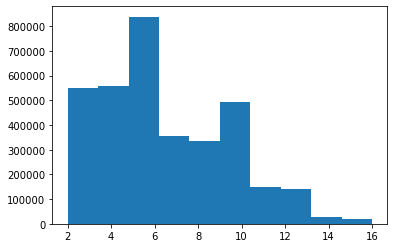

In [61]:
sr_surp = s_read_surp[0]
ss_surp = s_skipped_surp[0]

print(len(ss_surp))
print(len(sr_surp))

print(sr_surp.mean())
print(ss_surp.mean())

plt.hist(sr_surp)
# plt.hist(ss_surp)

print(ss_surp)

print(np.count_nonzero(sr_surp == 0))
print(np.count_nonzero(ss_surp == 0))

print(s_read_vocab)
print(s_skipped_vocab)